In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
file="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [4]:
df=pd.read_csv(file)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [5]:
lm= LinearRegression()
X = df[['highway-mpg']]
Y= df[['price']]

In [6]:
lm.fit(X,Y)
lm

LinearRegression()

In [7]:
from sklearn.linear_model import LinearRegression

X = df[['highway-mpg']]  # only one feature
y = df['price']

lm_simple = LinearRegression()
lm_simple.fit(X, y)

predicted_price = lm_simple.predict([[54]])
print("Predicted price for 54 highway-mpg:", predicted_price[0])


Predicted price for 54 highway-mpg: -5950.296571226572


c:\Users\msaic\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [8]:
lm.coef_

array([[-821.73337832]])

In [9]:
lm.intercept_

array([38423.30585816])

In [10]:
price= lm.coef_[0] * 26 + lm.intercept_
print("The predicted price of a 20 mpg automobile is: ", price)

The predicted price of a 20 mpg automobile is:  [17058.23802179]


In [11]:
z= df[[ 'horsepower', 'curb-weight', 'engine-size','highway-mpg']]

In [12]:
lm.fit(z,df['price'])

LinearRegression()

In [13]:
lm.intercept_

np.float64(-15806.62462632923)

In [14]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [15]:
Yhat=lm.predict(z)
Yhat[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [16]:

X_new = pd.DataFrame({
    'horsepower': [111, 101, 98, 120],
    'curb-weight': [2560, 2300, 2400, 2700],
    'engine-size': [130, 120, 115, 140],
    'highway-mpg': [54, 34, 33, 44]
})

predicted_prices = lm.predict(X_new)
print(predicted_prices)


[14729.15622182 11433.74410642 11300.31816528 16324.42380915]


(0.0, 22450.668458176646)

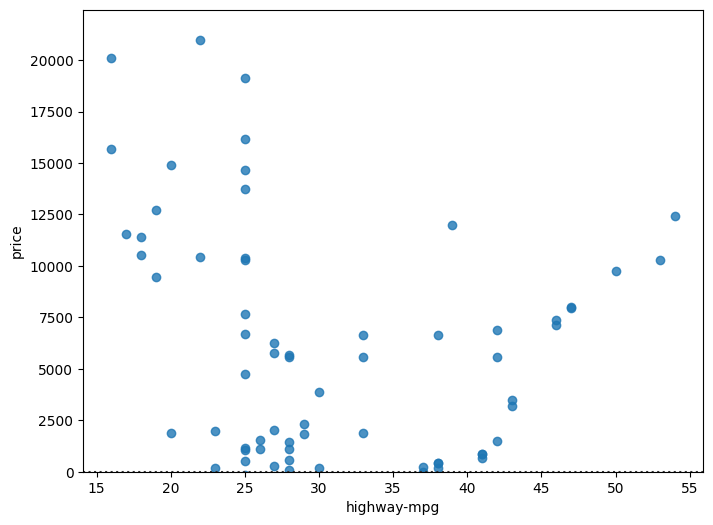

In [17]:
plt.figure(figsize=(8,6))
sns.residplot(x=df['highway-mpg'], y=df['price'],data=df)
plt.ylim(0,)

<Axes: xlabel='price', ylabel='Density'>

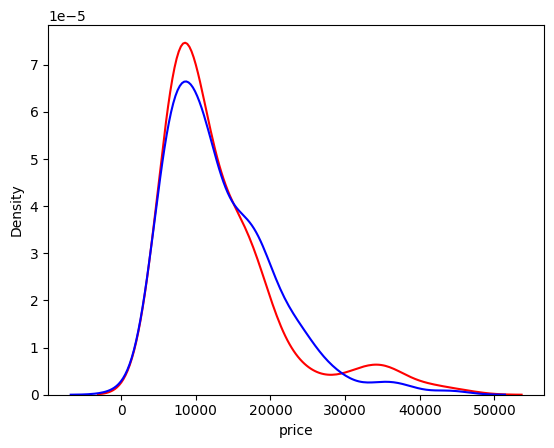

In [18]:
Y_hat=lm.predict(z)
ax1=sns.kdeplot(df['price'],color='r',label='actual values')
sns.kdeplot(Y_hat,color='b',label='fitted values',ax=ax1)

In [19]:
def polly(model,independent_variable,dependent_variable,Name):
    x_new=np.linspace(15,55,100)
    y_new=model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()    

In [20]:
x=df['highway-mpg']
y=df['price']

In [21]:
f=np.polyfit(x,y,3)
p=np.poly1d(f)

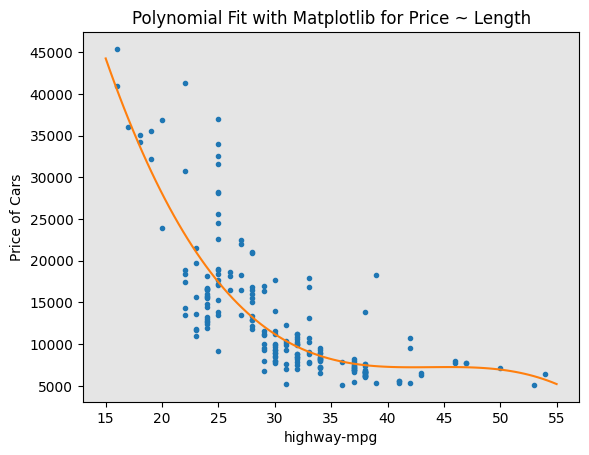

In [22]:
polly(p,x,y,'highway-mpg')

In [23]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [24]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [25]:
zr=pr.fit_transform(z)
zr

array([[1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.5400e+02, 2.8230e+03, ..., 2.3104e+04, 3.9520e+03,
        6.7600e+02],
       ...,
       [1.0000e+00, 1.3400e+02, 3.0120e+03, ..., 2.9929e+04, 3.9790e+03,
        5.2900e+02],
       [1.0000e+00, 1.0600e+02, 3.2170e+03, ..., 2.1025e+04, 3.9150e+03,
        7.2900e+02],
       [1.0000e+00, 1.1400e+02, 3.0620e+03, ..., 1.9881e+04, 3.5250e+03,
        6.2500e+02]], shape=(201, 15))

In [26]:
z.shape

(201, 4)

In [27]:
zr.shape

(201, 15)

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [29]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [30]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [31]:
z=z.astype('float')
pipe.fit(z,y)


Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [32]:
ni=pipe.predict(z)
ni[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [34]:
lm.fit(X,Y)
print(lm.score(X,Y))

0.4965911884339176


In [35]:
Yhat=lm.predict(X)
Yhat[0:4]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ]])

In [36]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse=mean_squared_error(df['price'],Yhat)
mse

31635042.944639888

In [38]:
rmse = np.sqrt(mse)
print(rmse)


5624.503795415191


In [39]:
lm.fit(z,df['price'])
lm.score(z,df['price'])

0.8093562806577457

In [40]:
ok=lm.predict(z)
mean_squared_error(df['price'],ok)

11980366.87072649

In [41]:
new=np.arange(1,100,1).reshape(-1,1)
lm.fit(X,Y)

Yhat=lm.predict(new)
Yhat[0:5]

c:\Users\msaic\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

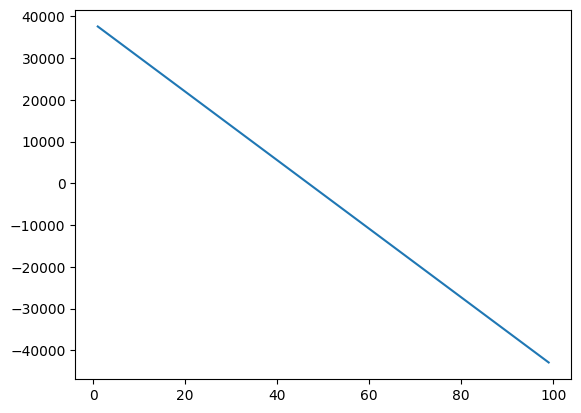

In [42]:
plt.plot(new,Yhat)
plt.show()